In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [71]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# **Explorartory Data Analysis**

In [44]:
df.shape

(891, 15)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [46]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [48]:
df.duplicated().sum()

np.int64(107)

In [49]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [50]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

<Axes: xlabel='pclass', ylabel='survived'>

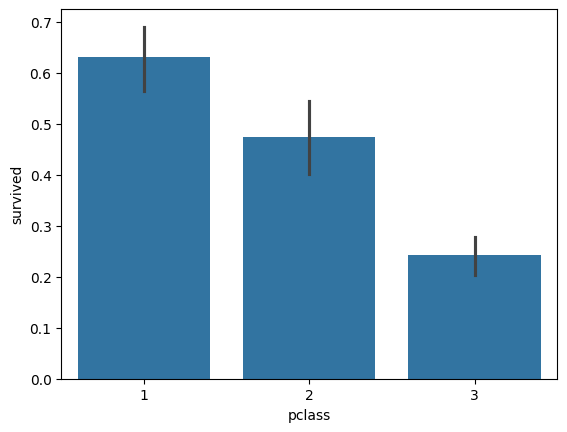

In [51]:
sns.barplot(x='pclass', y='survived', data=df)

In [52]:
df.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


<Axes: xlabel='sex', ylabel='survived'>

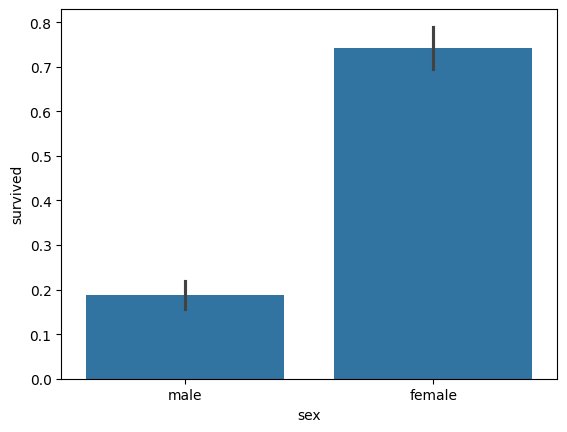

In [53]:
sns.barplot(x='sex', y='survived', data=df)

<Axes: xlabel='alone', ylabel='survived'>

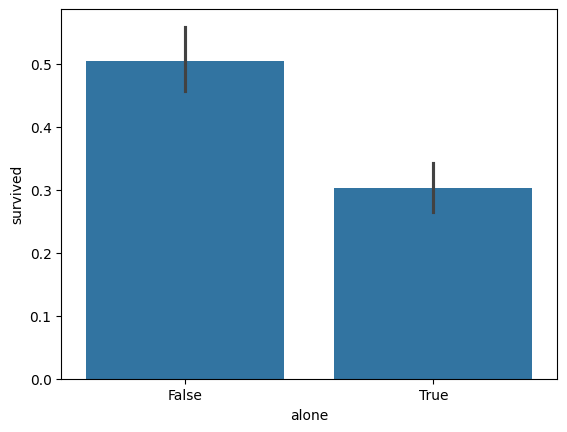

In [54]:
sns.barplot(data=df, x="alone", y="survived")


<Axes: xlabel='sex', ylabel='survived'>

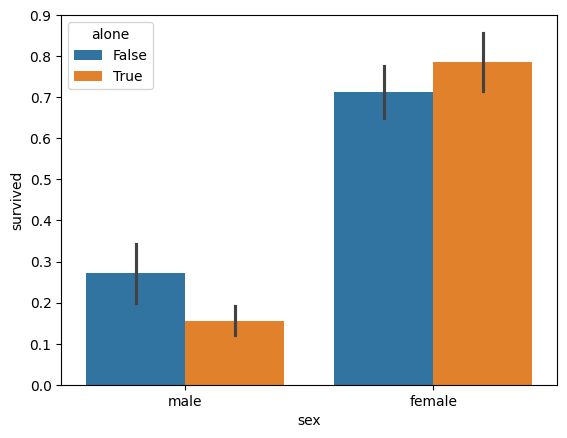

In [55]:
sns.barplot(data=df, x="sex", y="survived", hue="alone")


<Axes: xlabel='fare', ylabel='Count'>

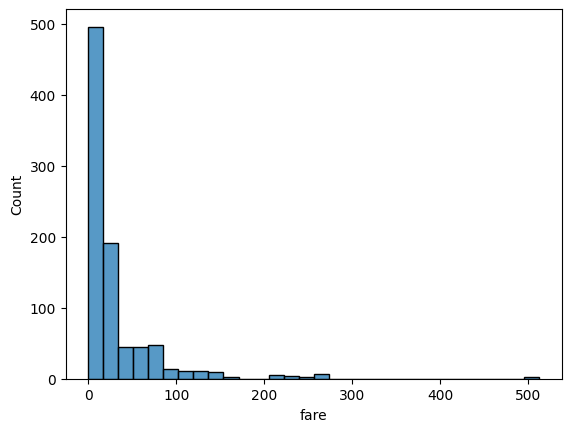

In [56]:
sns.histplot(df["fare"], bins=30)


<Axes: xlabel='survived', ylabel='count'>

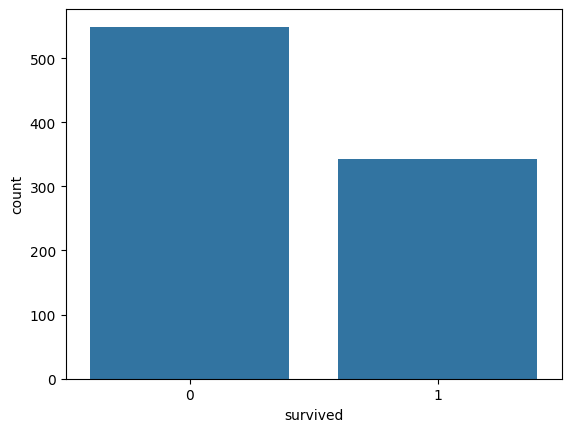

In [57]:
sns.countplot(x='survived', data=df)

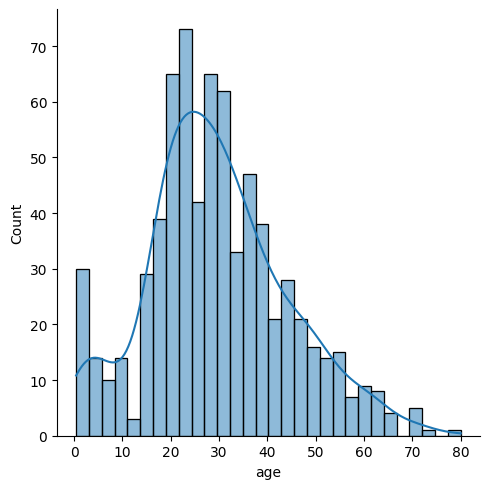

In [58]:
sns.displot(df['age'].dropna(), bins=30, kde=True)

<Axes: xlabel='embarked', ylabel='survived'>

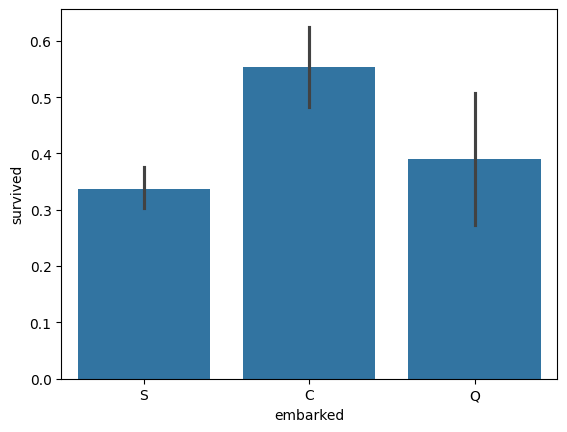

In [59]:
sns.barplot(x='embarked', y='survived', data=df )

In [60]:
df.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


<Axes: xlabel='survived', ylabel='fare'>

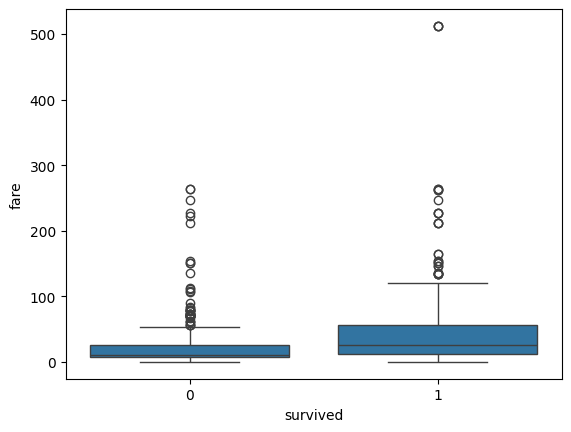

In [61]:
sns.boxplot(data=df, x="survived", y="fare")


<Axes: >

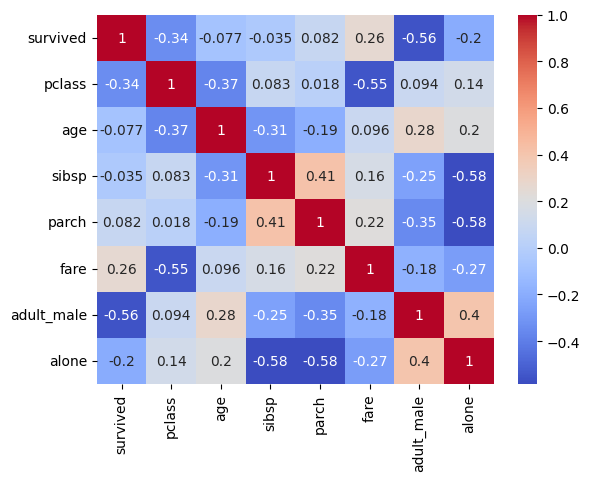

In [62]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

# **Data Cleaning**

In [81]:
df_cleaned = df.copy()

In [82]:
df_cleaned.isnull().sum()   

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [83]:
df_cleaned = df_cleaned.drop(columns=["alive", "embark_town", "adult_male", "class","deck", "who"])

In [84]:
df_cleaned.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [85]:
df_cleaned['age'].fillna(df_cleaned['age'].median(), inplace=True)

In [86]:
df_cleaned.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    2
alone       0
dtype: int64

In [87]:
df_cleaned.dropna(subset=['embarked'], inplace=True)


In [88]:
df_cleaned.shape

(889, 9)

In [89]:
df_cleaned.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
alone       0
dtype: int64

In [90]:
df_cleaned.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.25,S,False


# **Data Preprocessing**